In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

In [2]:
iris = datasets.load_iris(as_frame = True)
df = iris.frame
df = pd.DataFrame(df)
x = df.drop(['target'], axis = 1)
y = df['target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(f'Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.3f} %')

print(classification_report(y_test, y_pred))



Model Accuracy: 100.000 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



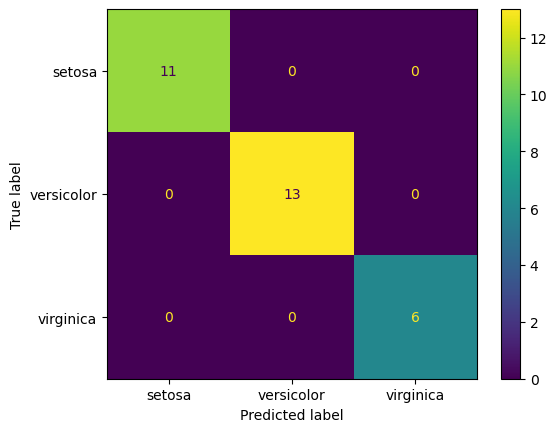

In [3]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = iris.target_names)
disp.plot()

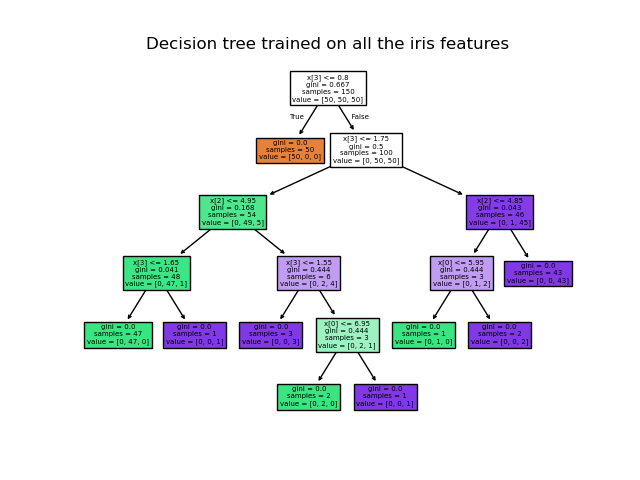

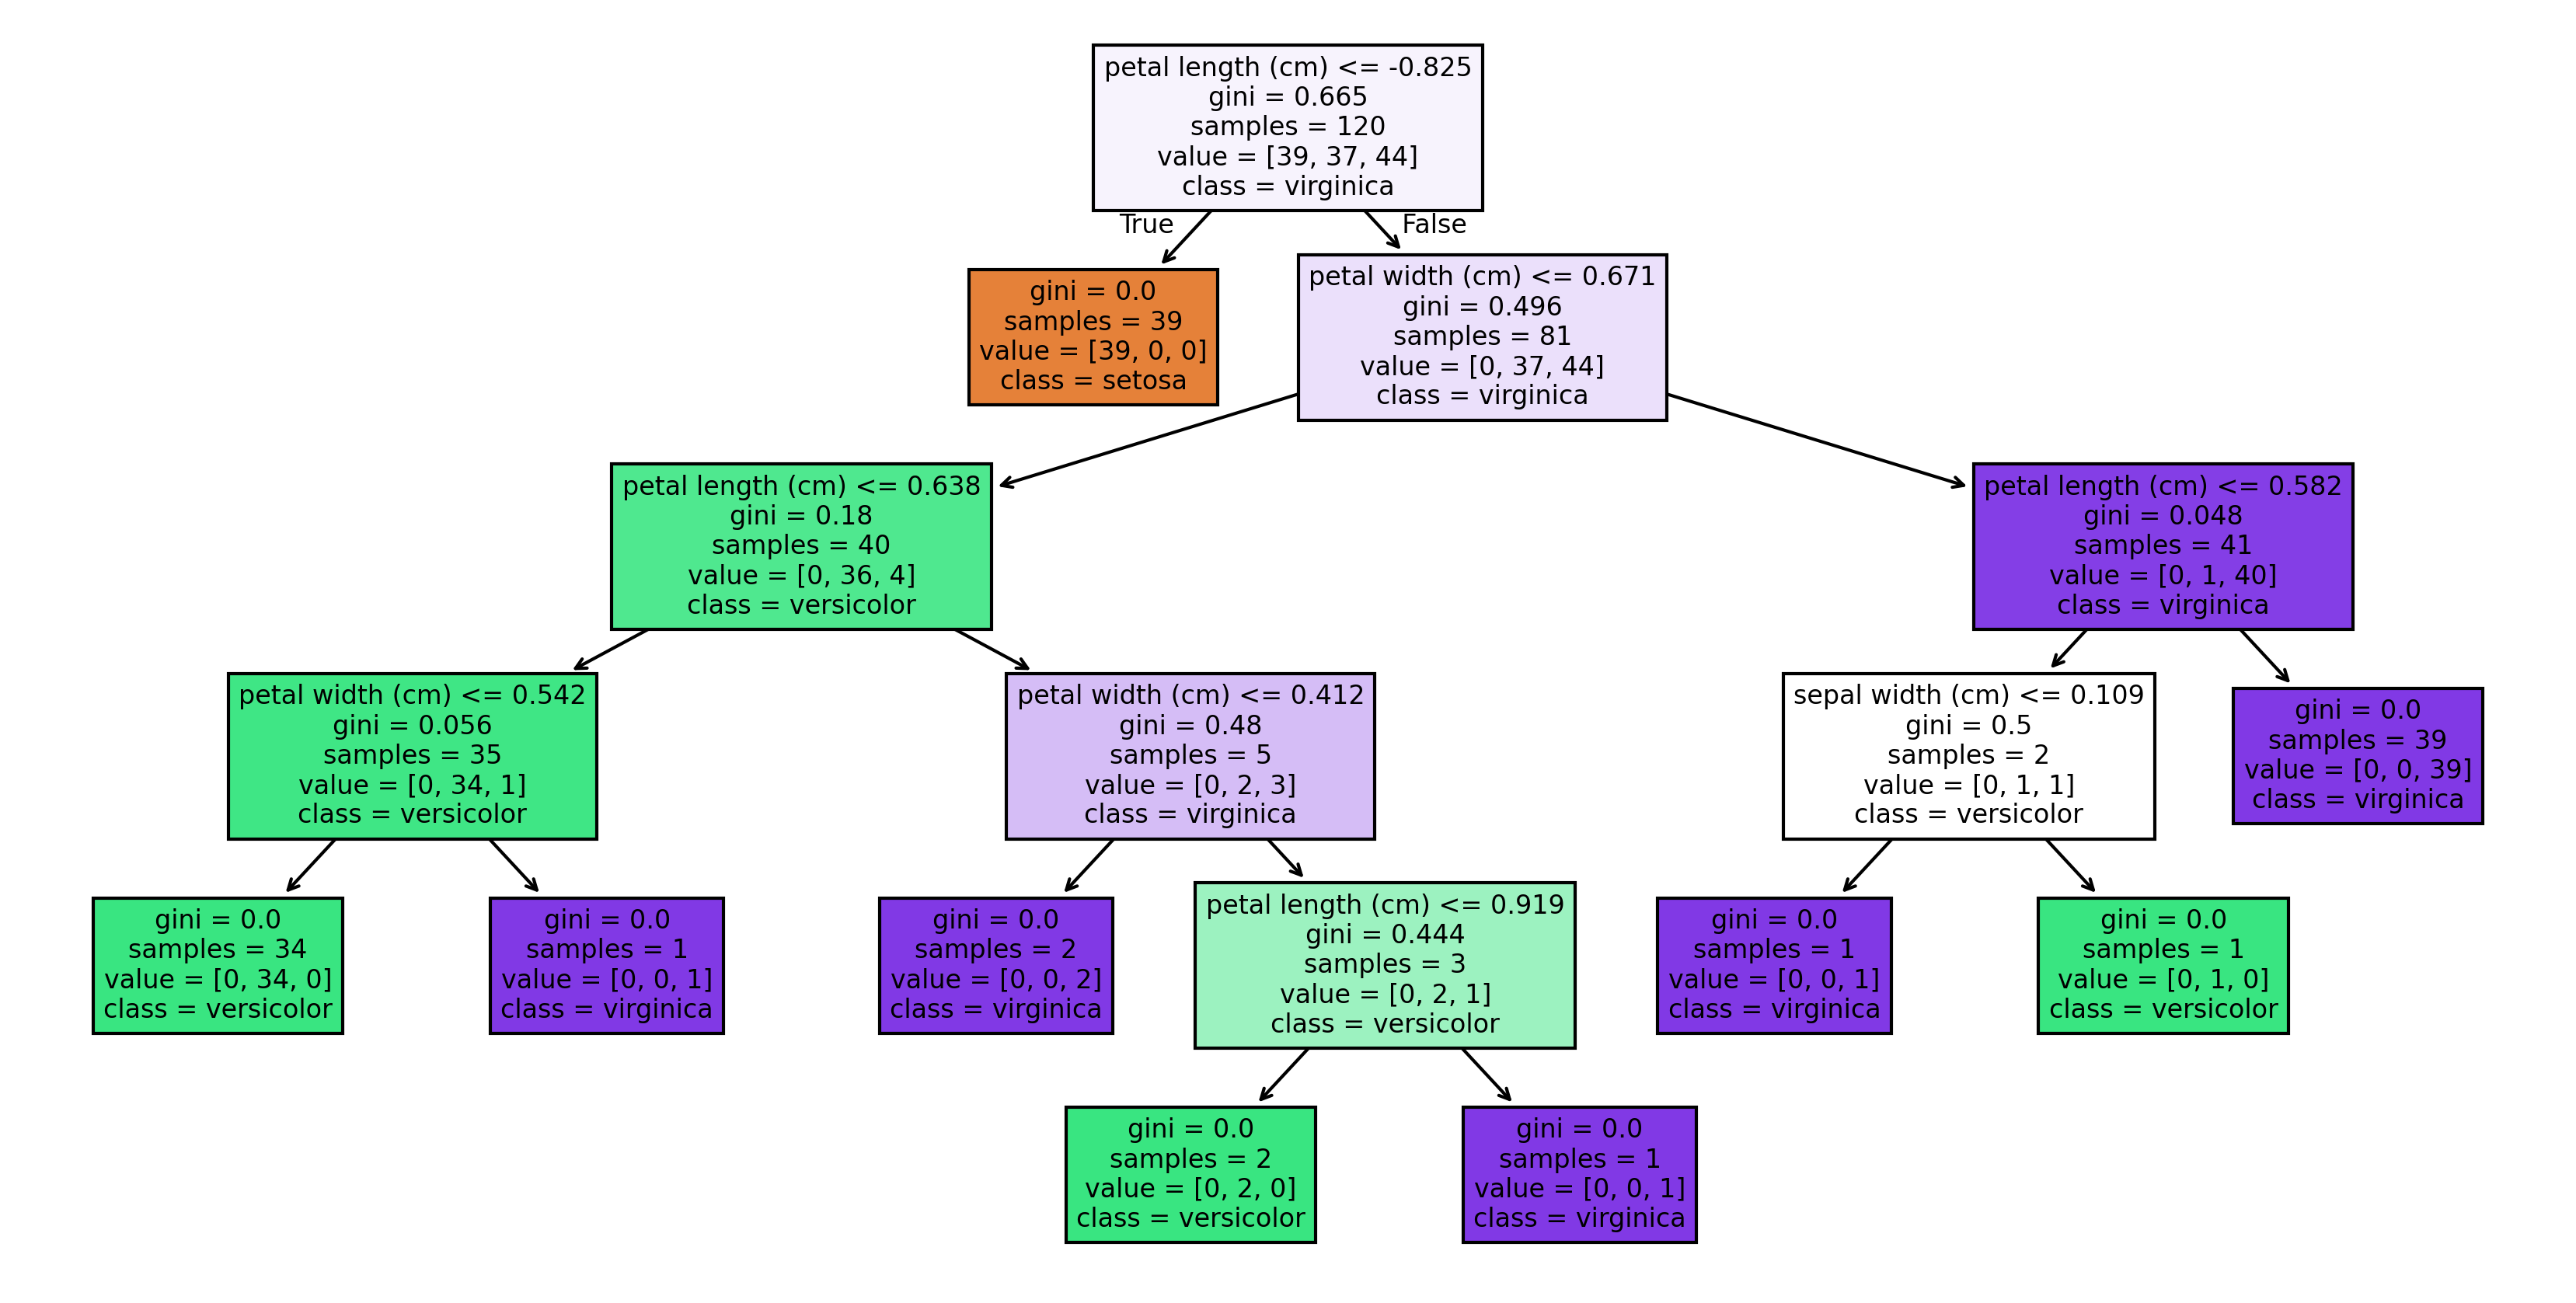

In [4]:
from sklearn import tree

plt.figure(figsize = (14, 7), dpi = 300) # w & h
ax = tree.plot_tree(model, feature_names = iris.feature_names, class_names = iris.target_names, filled = True)

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1,2,3]}

In [7]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid = params, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [8]:
grid.best_estimator_, grid.best_score_

(DecisionTreeClassifier(max_depth=2), 0.95)

In [9]:
grid.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(y_test, grid.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

